**Optimizations:** \
**Fine-tune learning rate and narrow dataset:** \
Test loss for Revenue model: 106.10247039794922 -> 02901458740234\
MSE for Revenue model: 106.10244727107235 -> 102.02894764584481\
MAE for Revenue model: 5.252847468606666 -> 4.94561613577825\
R² for Revenue model: 0.9582789573977678 -> 0.9957627089094524\

Test loss for COGS model: 5.4737467765808105 -> 21.09228515625 \
MSE for COGS model: 5.4737462218895745 -> 21.092287706213572 \
MAE for COGS model: 1.206369629653692 -> 2.3217709460823626 \
R² for COGS model: 0.9273778086148975 -> 0.9733923302071283 \

Test loss for Unit Cases model: 292.9974365234375 -> 797.8618774414062 \
MSE for Unit Cases model: 292.99744354965924 -> 797.8613100458189 \
MAE for Unit Cases model: 8.92381183568781 -> 13.005384469244214\
R² for Unit Cases model: 0.9707396416633955 -> 0.9831922715984656 \

##Installs

In [4]:
!pip install gdown

In [5]:
!pip install tensorflow

In [6]:
!pip install keras

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

##CSV Download

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Read the CSV file with Proportioned WDI Data Integrated

your_path_to_prop_wdi_data = "/content/drive/MyDrive/HDAG Coca-Cola /Week 8: Model Optimization and Shiny App/prop_wdi_final_data.csv" #'/content/drive/MyDrive/HDAG Coca-Cola /Week 7: Midpoint + Data + Model/prop_wdi_final_data_update.csv'
path = your_path_to_prop_wdi_data
prop_wdi_final_data = pd.read_csv(path)
# prop_wdi_final_data = pd.read_csv("/content/prop_wdi_final_data.csv")

In [10]:
prop_wdi_final_data['Revenue']

0       31.2910
1      587.3716
2       30.2174
3       -0.0546
4        7.7796
         ...   
541      0.0000
542      0.1238
543     13.7234
544      2.0686
545    102.0290
Name: Revenue, Length: 546, dtype: float64

In [11]:
# CODE BEFORE NARROWING DOWN FEATURES
# Remove non-numeric columns for simplicity
features = prop_wdi_final_data.select_dtypes(include=["number"])

features = features.drop(['Gross Profit', 'Brand Contribution', 'Revenue', 'COGS', 'Operating Expenses'], axis=1)
targets = prop_wdi_final_data[['Revenue', 'COGS', 'Unit Cases']]

# Split the data into training and testing sets
X_train = features[features['Year'] != 2023]
X_test = features[features['Year'] == 2023]
y_train = targets[features['Year'] != 2023]
y_test = targets[features['Year'] == 2023]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network for Revenue
model_revenue = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model_revenue.compile(optimizer=Adam(learning_rate=0.003), loss='mse')

# Neural network for COGS
model_cogs = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model_cogs.compile(optimizer=Adam(learning_rate=0.003), loss='mse')


# Neural network for Unit Cases
model_uc = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_uc.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Remove non-numeric columns for simplicity
features = prop_wdi_final_data.select_dtypes(include=["number"])

# Leave only the specified features
features = features[['Year', 'DME', 'Industry Value Final', 'DfR',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Labor force, total_valmultiplied',
       'Population in the largest city (% of urban population)_valmultiplied',
       'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)_valmultiplied',
       'Population in the largest city (% of urban population)_volume_multiplied',
       'Population in urban agglomerations of more than 1 million_volume_multiplied',
       'Population in urban agglomerations of more than 1 million (% of total population)_volume_multiplied']]
#features = features.drop(['Gross Profit', 'Brand Contribution', 'Revenue', 'COGS', 'Operating Expenses'], axis=1)
targets = prop_wdi_final_data[['Revenue', 'COGS', 'Unit Cases']]

# Split the data into training and testing sets
X_train = features[features['Year'] != 2023]
X_test = features[features['Year'] == 2023]
y_train = targets[features['Year'] != 2023]
y_test = targets[features['Year'] == 2023]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network for Revenue
model_revenue = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model_revenue.compile(optimizer=Adam(learning_rate=0.03), loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model for Revenue
history_revenue = model_revenue.fit(X_train_scaled, y_train['Revenue'], validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=0)

# Predictions for Revenue
y_pred_revenue = model_revenue.predict(X_test_scaled).flatten()

# Evaluate the model on the test set for Revenue
test_loss_revenue = model_revenue.evaluate(X_test_scaled, y_test['Revenue'], verbose=0)

# Additional metrics for Revenue
mse_revenue = mean_squared_error(y_test['Revenue'], y_pred_revenue)
mae_revenue = mean_absolute_error(y_test['Revenue'], y_pred_revenue)
r2_revenue = r2_score(y_test['Revenue'], y_pred_revenue)

# Print out the results
print(f'Test loss for Revenue model: {test_loss_revenue}')
print(f'MSE for Revenue model: {mse_revenue}')
print(f'MAE for Revenue model: {mae_revenue}')
print(f'R² for Revenue model: {r2_revenue}\n')

4/4 [==============================] - 0s 3ms/step
Test loss for Revenue model: 89.76207733154297
MSE for Revenue model: 89.76205343426363
MAE for Revenue model: 4.935911357222663
R² for Revenue model: 0.99627215650007



In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import Dense, LeakyReLU

# Remove non-numeric columns for simplicity
features = prop_wdi_final_data.select_dtypes(include=["number"])

# Leave only the specified features
features = features[['Year', 'DME', 'Industry Value Final', 'DfR', 'Population in largest city',
       'Labor force, total_valmultiplied',
       'Population in largest city_valmultiplied',
       'Population in urban agglomerations of more than 1 million_valmultiplied',
       'Labor force, total_volume_multiplied',
       'Population in largest city_volume_multiplied',
       'Population in urban agglomerations of more than 1 million_volume_multiplied']]
targets = prop_wdi_final_data[['Revenue', 'COGS', 'Unit Cases']]

# Split the data into training and testing sets
X_train = features[features['Year'] != 2023]
X_test = features[features['Year'] == 2023]
y_train = targets[features['Year'] != 2023]
y_test = targets[features['Year'] == 2023]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network for COGS
model_cogs = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dense(1)
])

model_cogs.compile(optimizer=Adam(learning_rate=0.03), loss='mse')

# Train the model for COGS
history_cogs = model_cogs.fit(X_train_scaled, y_train['COGS'], validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=0)

# Predictions for COGS
y_pred_cogs = model_cogs.predict(X_test_scaled).flatten()

# Evaluate the model on the test set for COGS
test_loss_cogs = model_cogs.evaluate(X_test_scaled, y_test['COGS'], verbose=0)

# Additional metrics for COGS
mse_cogs = mean_squared_error(y_test['COGS'], y_pred_cogs)
mae_cogs = mean_absolute_error(y_test['COGS'], y_pred_cogs)
r2_cogs = r2_score(y_test['COGS'], y_pred_cogs)

print(f'Test loss for COGS model: {test_loss_cogs}')
print(f'MSE for COGS model: {mse_cogs}')
print(f'MAE for COGS model: {mae_cogs}')
print(f'R² for COGS model: {r2_cogs}\n')

4/4 [==============================] - 0s 3ms/step
Test loss for COGS model: 43.00800704956055
MSE for COGS model: 43.00799601663249
MAE for COGS model: 2.50837442173428
R² for COGS model: 0.945745925126624



In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Remove non-numeric columns for simplicity
features = prop_wdi_final_data.select_dtypes(include=["number"])

# Leave only the specified features
features = features[['Year', 'DME', 'Industry Value Final', 'DfR',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)_valmultiplied',
       'Labor force, total_valmultiplied',
       'Population in largest city_valmultiplied',
       'Population in largest city_volume_multiplied',
       'Population in the largest city (% of urban population)_volume_multiplied',
       'Population in urban agglomerations of more than 1 million_volume_multiplied',
       'Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)_volume_multiplied']]
#features = features.drop(['Gross Profit', 'Brand Contribution', 'Revenue', 'COGS', 'Operating Expenses'], axis=1)
targets = prop_wdi_final_data[['Revenue', 'COGS', 'Unit Cases']]

# Split the data into training and testing sets
X_train = features[features['Year'] != 2023]
X_test = features[features['Year'] == 2023]
y_train = targets[features['Year'] != 2023]
y_test = targets[features['Year'] == 2023]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network for Unit Cases
model_uc = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dense(128, activation=LeakyReLU(alpha=0.01)),
    Dense(1)
])

model_uc.compile(optimizer=Adam(learning_rate=0.07), loss='mse')

# Train the model for Unit Unit Cases
history_uc = model_uc.fit(X_train_scaled, y_train['Unit Cases'], validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=0)

# Predictions for Unit Cases
y_pred_uc = model_uc.predict(X_test_scaled).flatten()

# Evaluate the model on the test set for Unit Cases
test_loss_uc = model_uc.evaluate(X_test_scaled, y_test['Unit Cases'], verbose=0)

# Additional metrics for Unit Cases
mse_uc = mean_squared_error(y_test['Unit Cases'], y_pred_uc)
mae_uc = mean_absolute_error(y_test['Unit Cases'], y_pred_uc)
r2_uc = r2_score(y_test['Unit Cases'], y_pred_uc)

print(f'Test loss for Unit Cases model: {test_loss_uc}')
print(f'MSE for Unit Cases model: {mse_uc}')
print(f'MAE for Unit Cases model: {mae_uc}')
print(f'R² for Unit Cases model: {r2_uc}')

4/4 [==============================] - 0s 6ms/step
Test loss for Unit Cases model: 953.2394409179688
MSE for Unit Cases model: 953.2398770300553
MAE for Unit Cases model: 13.093676214728534
R² for Unit Cases model: 0.9799190702031746


In [15]:
results_df = pd.DataFrame({
    'Actual Revenue': y_test['Revenue'],
    'Predicted Revenue': y_pred_revenue,
    'Revenue Residual': y_test['Revenue'] - y_pred_revenue,
    'Actual COGS': y_test['COGS'],
    'Predicted COGS': y_pred_cogs,
    'COGS Residual': y_test['COGS'] - y_pred_cogs,
    'Actual Unit Cases': y_test['Unit Cases'],
    'Predicted Unit Cases': y_pred_uc,
    'Unit Cases Residual': y_test['Unit Cases'] - y_pred_uc,
})

results_df

,Actual Revenue,Predicted Revenue,Revenue Residual,Actual COGS,Predicted COGS,COGS Residual,Actual Unit Cases,Predicted Unit Cases,Unit Cases Residual
438,41.0254,31.193403,9.831997,4.1262,3.342263,0.783937,14.7328,1.565376,13.167424
439,741.4114,708.511963,32.899437,87.4427,92.861748,-5.419048,944.8182,906.108154,38.710046
440,27.3980,25.179483,2.218517,14.2541,11.652998,2.601102,19.0232,5.454554,13.568646
441,0.0000,3.423824,-3.423824,0.0000,2.065974,-2.065974,13.9992,6.005823,7.993377
442,10.9329,1.231948,9.700952,1.4507,1.061878,0.388822,3.7105,-0.263020,3.973520
...,...,...,...,...,...,...,...,...,...
541,0.0000,1.231948,-1.231948,0.0000,0.565998,-0.565998,0.0000,-0.652131,0.652131
542,0.1238,1.231948,-1.108148,0.0387,0.578259,-0.539559,0.0857,-0.571683,0.657383
543,13.7234,13.963980,-0.240580,4.5943,2.890593,1.703707,20.6379,1.740888,18.897012
544,2.0686,1.325859,0.742741,1.3515,0.950461,0.401039,3.8077,1.592872,2.214828


In [ ]:
results_df.to_csv('results.csv', index = False)

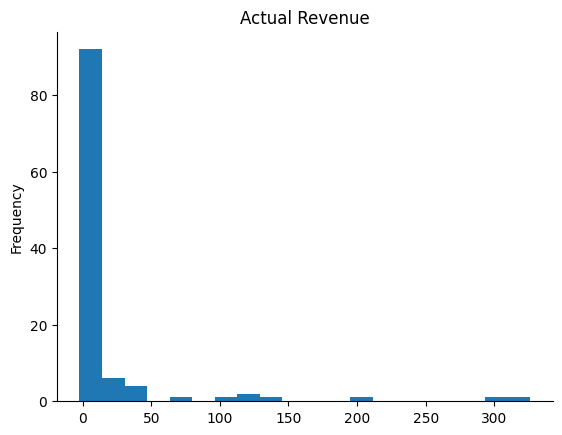

In [ ]:
# @title Actual Revenue

from matplotlib import pyplot as plt
results_df['Actual Revenue'].plot(kind='hist', bins=20, title='Actual Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

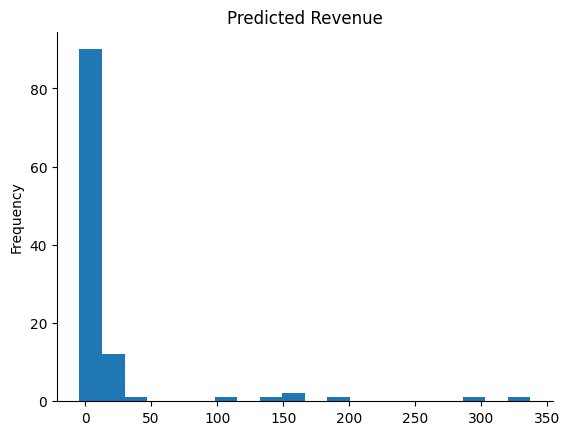

In [ ]:
# @title Predicted Revenue

from matplotlib import pyplot as plt
results_df['Predicted Revenue'].plot(kind='hist', bins=20, title='Predicted Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

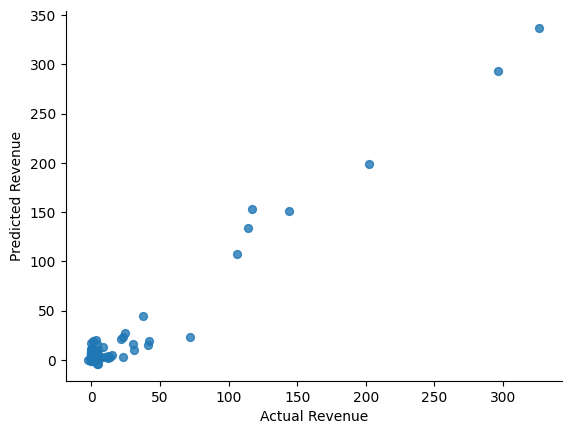

In [ ]:
# @title Actual Revenue vs Predicted Revenue

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual Revenue', y='Predicted Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

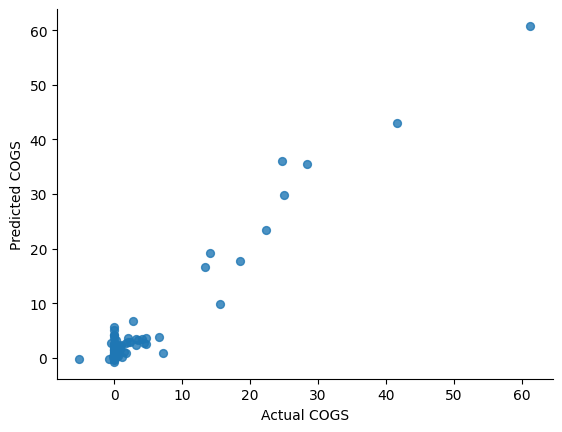

In [ ]:
# @title Actual COGS vs Predicted COGS

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual COGS', y='Predicted COGS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Actual Unit Cases vs Predicted Unit Cases

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual Unit Cases', y='Predicted Unit Cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'results_df' is not defined